**Prodigy InfoTech**

**TASK-01**

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from scipy.stats import skew, norm

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


Text(0, 0.5, 'SalePrice')

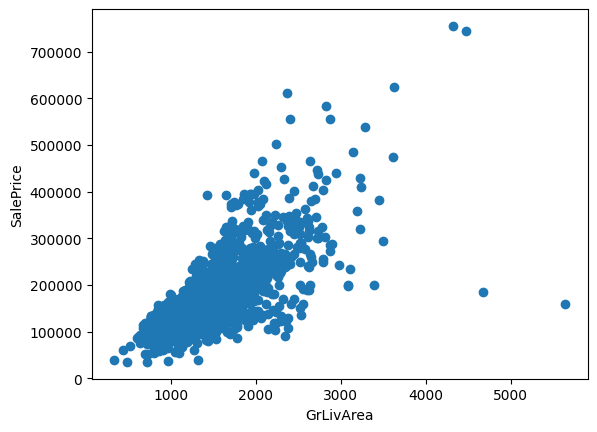

In [4]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = train)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [5]:
#Checking Outliers

train['GrLivArea'].sort_values(ascending=False)[:2]

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [6]:
#Removing Outliers

train=train[train['GrLivArea']<4670]
train.shape

(1458, 81)

In [7]:
train_id=train['Id']
test_id=test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
print(train.shape,test.shape)

(1458, 80) (1459, 79)


<ipython-input-7-a648053bd5c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Id',axis=1,inplace=True)


<ipython-input-8-667bfa536d5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],fit=norm)


1.8812964895244009


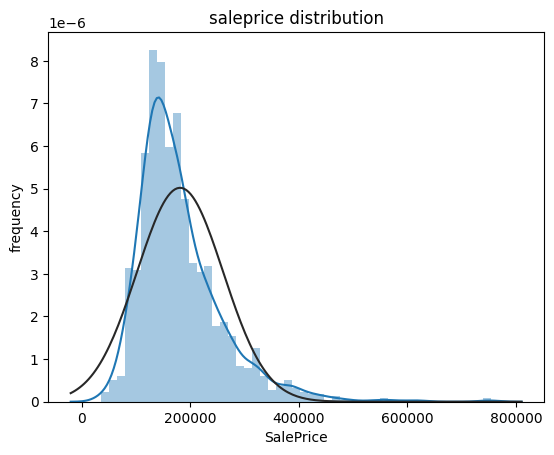

In [8]:
sns.distplot(train['SalePrice'],fit=norm)
plt.title('saleprice distribution')
plt.ylabel('frequency')
print(train['SalePrice'].skew())

# Positive skewness suggests a distribution that is skewed to the right,
# There are outliers or higher values in the distribution.

<ipython-input-9-949276dc04f7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],fit=norm)


0.12157976050304879


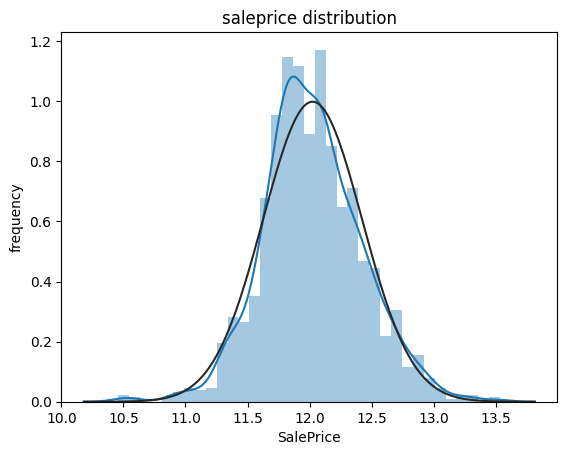

In [9]:
#Transforming the 'SalePrice' variable using the natural logarithm function

train['SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
plt.title('saleprice distribution')
plt.ylabel('frequency')
print(train['SalePrice'].skew())

In [10]:
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop('SalePrice',axis=1,inplace=True)
all_data.shape

(2917, 79)

In [11]:
y=train['SalePrice']

In [12]:
#Count of missing values in top 35 columns arranged in descending order.

all_data.isnull().sum().sort_values(ascending=False)[:35]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
TotRmsAbvGrd       0
dtype: int64

In [13]:
all_data['GarageCars'].fillna(0,inplace=True)
all_data['GarageArea'].fillna(0,inplace=True)
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0],inplace=True)
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0],inplace=True)
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0],inplace=True)
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0],inplace=True)
all_data['TotalBsmtSF'].fillna(0,inplace=True)
all_data['Exterior2nd'].fillna('NA',inplace=True)
all_data['BsmtFinSF1'].fillna(0,inplace=True)
all_data['BsmtFinSF2'].fillna(0,inplace=True)
all_data['BsmtUnfSF'].fillna(0,inplace=True)
all_data['BsmtFullBath'].fillna('NA',inplace=True)
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)
all_data['Utilities'].fillna(all_data['Utilities'].mode()[0],inplace=True)
all_data['BsmtHalfBath'].fillna('NA',inplace=True)
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].mean(),inplace=True)
all_data['MasVnrType'].fillna(all_data['MasVnrType'].mode()[0],inplace=True)


all_data.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MSSubClass         0
KitchenAbvGr       0
KitchenQual        0
Functional         0
dtype: int64

In [14]:
all_data['BsmtFinType2'].fillna('NA',inplace=True)
all_data['BsmtCond'].fillna('NA',inplace=True)
all_data['BsmtExposure'].fillna('NA',inplace=True)
all_data['GarageType'].fillna('NA',inplace=True)
all_data['GarageQual'].fillna('NA',inplace=True)
all_data['GarageCond'].fillna('NA',inplace=True)
all_data['GarageFinish'].fillna('NA',inplace=True)
all_data.isnull().sum().sort_values(ascending=False)[:10]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
BsmtQual          81
BsmtFinType1      79
MSSubClass         0
dtype: int64

In [15]:
all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
all_data.isnull().sum().sort_values(ascending=False)[:5]

LotFrontage     486
GarageYrBlt     159
BsmtQual         81
BsmtFinType1     79
Functional        0
dtype: int64

In [16]:
corr_data=all_data.corr()
corr_data['LotFrontage'].sort_values(ascending=False)[:6]

<ipython-input-16-c0c8d82a2400>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=all_data.corr()


LotFrontage     1.000000
LotArea         0.468809
1stFlrSF        0.434338
GrLivArea       0.356856
GarageArea      0.349763
TotRmsAbvGrd    0.340943
Name: LotFrontage, dtype: float64

Text(0, 0.5, 'LotArea')

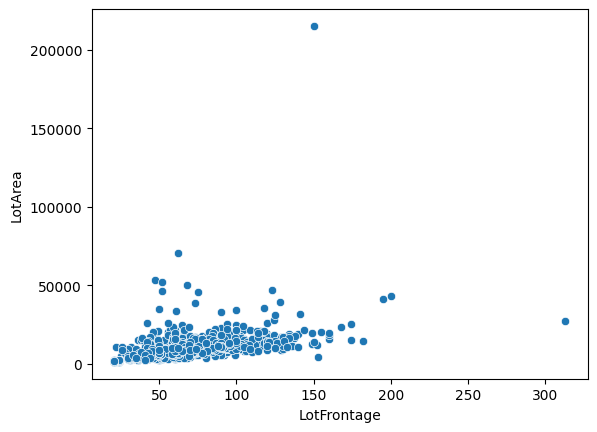

In [17]:
sns.scatterplot(x='LotFrontage',y='LotArea',data=all_data)
plt.xlabel('LotFrontage')
plt.ylabel('LotArea')

In [18]:
all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean(),inplace=True)

In [19]:
all_data['GarageYrBlt'].fillna(0,inplace=True)
all_data.isnull().sum().sort_values(ascending=False)[:5]

BsmtQual        81
BsmtFinType1    79
MSSubClass       0
Functional       0
TotRmsAbvGrd     0
dtype: int64

In [20]:
all_data['BsmtQual'].fillna('NA',inplace=True)
all_data['BsmtFinType1'].fillna('NA',inplace=True)
all_data.isnull().sum().sort_values(ascending=False)[:5]

MSSubClass      0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64

In [21]:
all_data.dtypes[all_data.dtypes!='object'][:60]

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [22]:
all_data['MoSold']=all_data['MoSold']/13
all_data['YrSold']+=all_data['MoSold']

In [23]:
all_data.drop('MoSold',axis=1,inplace=True)

In [24]:
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)
all_data['OverallCond']=all_data['OverallCond'].apply(str)
all_data['OverallQual']=all_data['OverallQual'].apply(str)

In [25]:
numeric=all_data.dtypes[all_data.dtypes!='object'].index
numeric

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold'],
      dtype='object')

<ipython-input-26-3883b5c440a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=all_data.corr()


<Axes: >

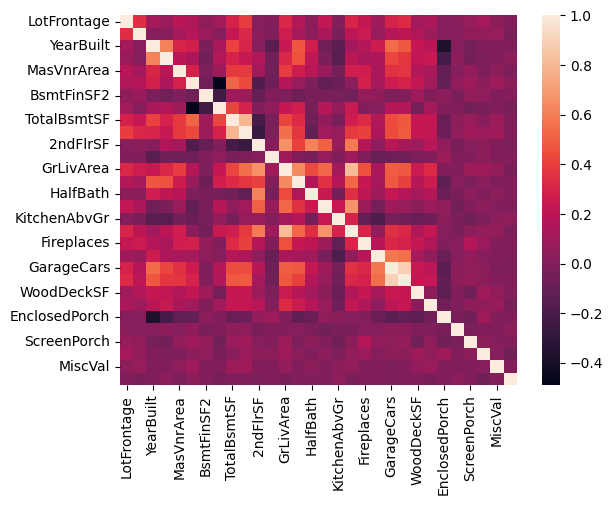

In [26]:
corr_data=all_data.corr()
sns.heatmap(corr_data)

In [27]:
all_data[numeric].skew()

LotFrontage       1.228937
LotArea          13.116240
YearBuilt        -0.599503
YearRemodAdd     -0.450365
MasVnrArea        2.621055
BsmtFinSF1        0.981149
BsmtFinSF2        4.146636
BsmtUnfSF         0.920161
TotalBsmtSF       0.672097
1stFlrSF          1.257933
2ndFlrSF          0.861999
LowQualFinSF     12.090757
GrLivArea         1.069300
FullBath          0.165599
HalfBath          0.697024
BedroomAbvGr      0.326736
KitchenAbvGr      4.302763
TotRmsAbvGrd      0.749618
Fireplaces        0.725651
GarageYrBlt      -3.906642
GarageCars       -0.219410
GarageArea        0.216968
WoodDeckSF        1.845741
OpenPorchSF       2.530660
EnclosedPorch     4.004404
3SsnPorch        11.377932
ScreenPorch       3.947131
PoolArea         17.697766
MiscVal          21.950962
YrSold            0.056312
dtype: float64

In [28]:
for features in numeric:
    if all_data[features].skew()>0.7:
        all_data[features]=np.log1p(all_data[features])
all_data[numeric].skew()

LotFrontage      -1.066634
LotArea          -0.532920
YearBuilt        -0.599503
YearRemodAdd     -0.450365
MasVnrArea        0.506239
BsmtFinSF1       -0.616808
BsmtFinSF2        2.462526
BsmtUnfSF        -2.155250
TotalBsmtSF       0.672097
1stFlrSF          0.030374
2ndFlrSF          0.306786
LowQualFinSF      8.559041
GrLivArea        -0.022062
FullBath          0.165599
HalfBath          0.697024
BedroomAbvGr      0.326736
KitchenAbvGr      3.520694
TotRmsAbvGrd      0.028378
Fireplaces        0.236180
GarageYrBlt      -3.906642
GarageCars       -0.219410
GarageArea        0.216968
WoodDeckSF        0.159605
OpenPorchSF      -0.041559
EnclosedPorch     1.960960
3SsnPorch         8.826656
ScreenPorch       2.946085
PoolArea         15.631314
MiscVal           5.214687
YrSold            0.056312
dtype: float64

In [29]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2008.153846,WD,Normal
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,2007.384615,WD,Normal
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,2008.692308,WD,Normal
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2006.153846,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,2008.923077,WD,Normal


In [30]:
#one-hot encoding

all_data=pd.get_dummies(all_data)
all_data.shape

(2917, 317)

In [31]:
all_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,2003,2003,5.283204,6.561031,0.0,5.017280,856.0,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,1976,1976,0.000000,6.886532,0.0,5.652489,1262.0,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,2001,2002,5.093750,6.188264,0.0,6.075346,920.0,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,1915,1970,0.000000,5.379897,0.0,6.293419,756.0,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,2000,2000,5.860786,6.486161,0.0,6.196444,1145.0,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [32]:
n=train.shape[0]
n

1458

In [33]:
train=all_data[:n]
test=all_data[n:]
print('train:',train.shape,'test:',test.shape)

train: (1458, 317) test: (1459, 317)


In [34]:
scorer=make_scorer(mean_squared_error,greater_is_better=False)

In [35]:
x_train,x_test,y_train,true_p=train_test_split(train,y,random_state=121,test_size=0.2,shuffle=True)
print('x_train,x_test,y_train,true_p\n')
print(x_train.shape,x_test.shape,y_train.shape,true_p.shape)

x_train,x_test,y_train,true_p

(1166, 317) (292, 317) (1166,) (292,)


In [36]:
def rmse_train_cv(model):
    rmse=np.sqrt(-cross_val_score(model,x_train,y_train,cv=5,scoring=scorer))
    return rmse
def rmse_test_cv(model):
    rmse=np.sqrt(-cross_val_score(model,x_test,true_p,cv=5,scoring=scorer))
    return rmse

In [37]:
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,Ridge,Lasso

In [38]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)
print('rmse value of train=',rmse_train_cv(lreg).mean())
print('rmse value of test=',rmse_test_cv(lreg).mean())

rmse value of train= 0.13313364674200748
rmse value of test= 0.5110570340526324


In [39]:
train_pred=lreg.predict(x_train)
test_pred=lreg.predict(x_test)

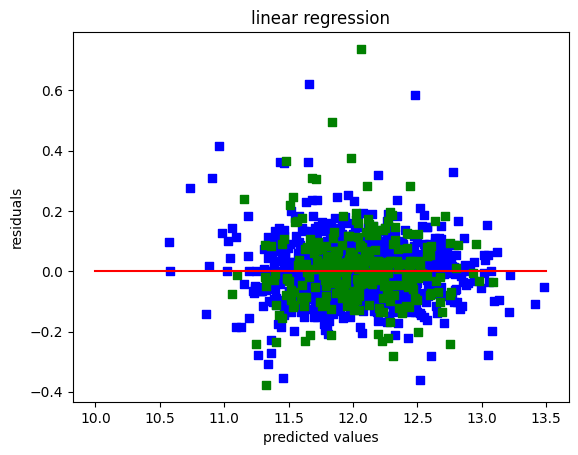

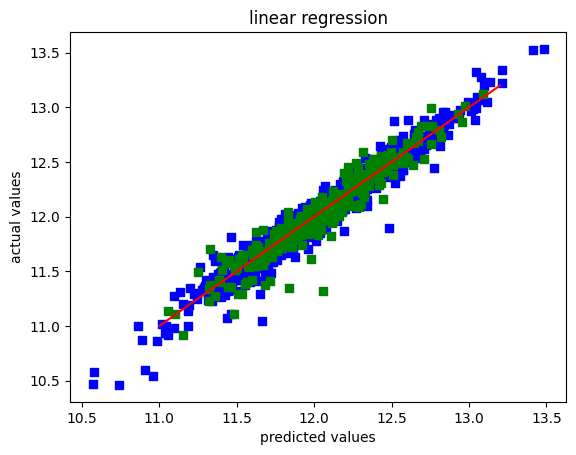

In [40]:
plt.scatter(x=train_pred,y=train_pred-y_train,c='blue',marker='s',label='train data')
plt.scatter(x=test_pred,y=test_pred-true_p,c='green',marker='s',label='test data')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.title('linear regression')
plt.plot([10.0,13.5],[0.0,0.0],c='red')
plt.show()

plt.scatter(x=train_pred,y=y_train,c='blue',marker='s',label='train data')
plt.scatter(x=test_pred,y=true_p,c='green',marker='s',label='test data')

plt.xlabel('predicted values')
plt.ylabel('actual values')

plt.title('linear regression')
plt.plot([11.0,13.2],[11.0,13.2],c='red')
plt.show()

In [41]:
r2_score(test_pred,true_p)

0.898821674508312

In [42]:
x_train,x_test,y_train,true_p=train_test_split(train,y,random_state=121,test_size=0.2,shuffle=True)
print('x_train,x_test,y_train,true_p\n')
print(x_train.shape,x_test.shape,y_train.shape,true_p.shape)

x_train,x_test,y_train,true_p

(1166, 317) (292, 317) (1166,) (292,)


In [43]:
#Ridge Regression

alphas=[0.001,0.003,0.007,0.01,0.03,0.06,0.09,0.2,0.6,1,3,6,10,30]

ridge=RidgeCV(alphas)
ridge.fit(x_train,y_train)
alpha=ridge.alpha_

print('best alpha:',alpha)

best alpha: 6.0


In [44]:
print('optimising alpha')
alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4]
ridge=RidgeCV(alphas,cv=10)
ridge.fit(x_train,y_train)
best_alpha=ridge.alpha_
print('optimised alpha:',best_alpha)

optimising alpha
optimised alpha: 5.699999999999999


In [45]:
print('rmse value of train data in ridge regression:',rmse_train_cv(ridge).mean())
print('rmse value of test data in ridge regression:',rmse_test_cv(ridge).mean())

rmse value of train data in ridge regression: 0.11633888341187451
rmse value of test data in ridge regression: 0.14000690329282786


In [46]:
train_pred=ridge.predict(x_train)
test_pred=ridge.predict(x_test)

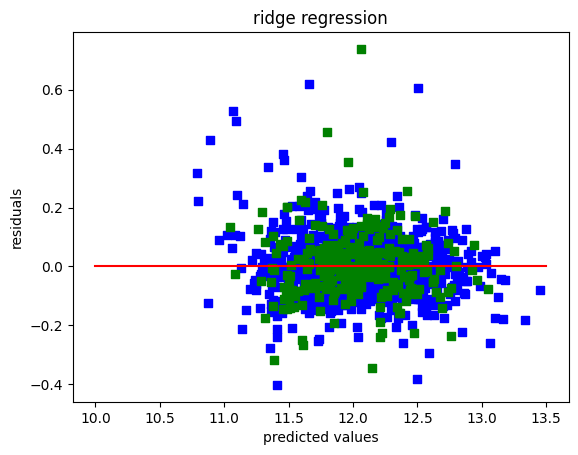

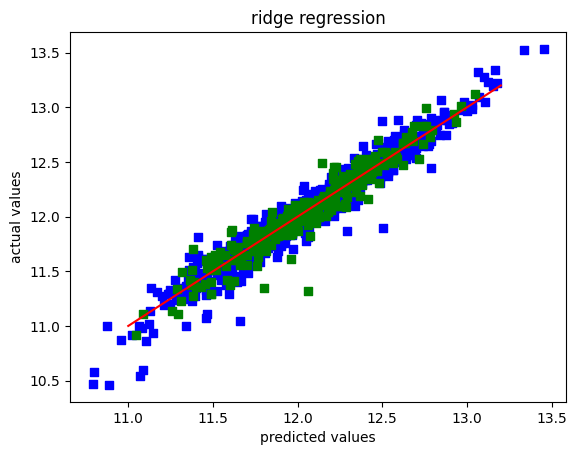

In [47]:
plt.scatter(x=train_pred,y=train_pred-y_train,c='blue',marker='s',label='train data')
plt.scatter(x=test_pred,y=test_pred-true_p,c='green',marker='s',label='test data')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.title('ridge regression')
plt.plot([10.0,13.5],[0.0,0.0],c='red')
plt.show()

plt.scatter(x=train_pred,y=y_train,c='blue',marker='s',label='train data')
plt.scatter(x=test_pred,y=true_p,c='green',marker='s',label='test data')

plt.xlabel('predicted values')
plt.ylabel('actual values')

plt.title('ridge regression')
plt.plot([11.0,13.2],[11.0,13.2],c='red')
plt.show()

In [48]:
r2_score(test_pred,true_p)

0.911759912730273

In [49]:
#Lasso Regression

lasso=LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                          0.3, 0.6, 1],cv=10,max_iter=10000)
lasso.fit(x_train,y_train)
alpha=lasso.alpha_
print('best alpha:',alpha)

best alpha: 0.0003


In [50]:
print('optimising alpha')
lasso=LassoCV(alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv=10,max_iter=10000)
lasso.fit(x_train,y_train)
best_alpha=lasso.alpha_
print('optimised alpha:',best_alpha)

optimising alpha
optimised alpha: 0.00031499999999999996


In [51]:
train_pred=lasso.predict(x_train)
test_pred=lasso.predict(x_test)

In [52]:
print('rmse value of train data in lasso regression:',rmse_train_cv(lasso).mean())
print('rmse value of test data in lasso regression:',rmse_test_cv(lasso).mean())

rmse value of train data in lasso regression: 0.11410684339560753
rmse value of test data in lasso regression: 0.14111826351510517


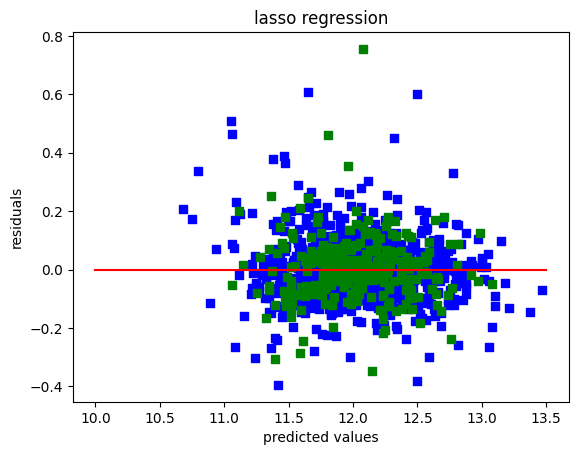

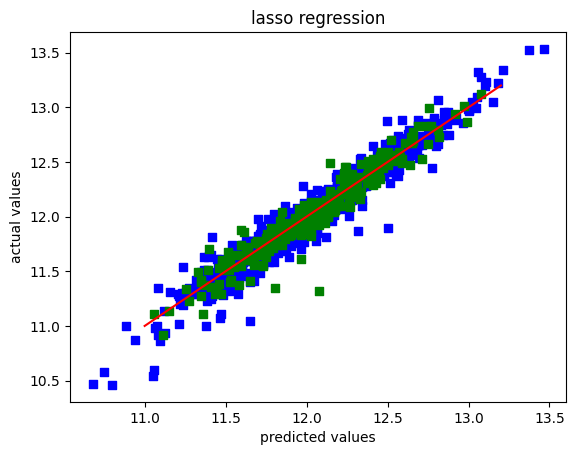

In [53]:
plt.scatter(x=train_pred,y=train_pred-y_train,c='blue',marker='s',label='train data')
plt.scatter(x=test_pred,y=test_pred-true_p,c='green',marker='s',label='test data')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.title('lasso regression')
plt.plot([10.0,13.5],[0.0,0.0],c='red')
plt.show()

plt.scatter(x=train_pred,y=y_train,c='blue',marker='s',label='train data')
plt.scatter(x=test_pred,y=true_p,c='green',marker='s',label='test data')

plt.xlabel('predicted values')
plt.ylabel('actual values')

plt.title('lasso regression')
plt.plot([11.0,13.2],[11.0,13.2],c='red')
plt.show()

In [54]:
r2_score(test_pred,true_p)

0.915854115196911

In [57]:
final_pred = lreg.predict(test)

sub = pd.DataFrame({
    'Id': test_id,
    'SalePrice': final_pred
})

print(sub)

        Id  SalePrice
0     1461  11.685046
1     1462  11.957124
2     1463  12.150557
3     1464  12.203119
4     1465  12.184422
...    ...        ...
1454  2915  11.332097
1455  2916  11.328451
1456  2917  12.075751
1457  2918  11.742990
1458  2919  12.292257

[1459 rows x 2 columns]


In [55]:
'''
final_pred=lreg.predict(test)

sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = final_pred

sub.to_csv('submission.csv',index=False)
'''